
# Project: Investigate Cars DataSet
## By Mahmoud Osama

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data come from the Kaggle dataset Car Features and MSRP of Kaggle. It describes almost 3000 car models sold in the USA between 1990 and 2018 with the market price (new or used) and some features. This study aims at performing some data manipulations and define a statistical model to predict the price of a car.
>
> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df=pd.read_csv('data.csv') #Loading the data

In [3]:
df.head()#taking a look at a sample of the df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.info()#taking a look at the info of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939 entries, 0 to 2938
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               2939 non-null   object 
 1   Model              2939 non-null   object 
 2   Year               2939 non-null   int64  
 3   Engine Fuel Type   2939 non-null   object 
 4   Engine HP          2932 non-null   float64
 5   Engine Cylinders   2937 non-null   float64
 6   Transmission Type  2939 non-null   object 
 7   Driven_Wheels      2939 non-null   object 
 8   Number of Doors    2939 non-null   int64  
 9   Market Category    2024 non-null   object 
 10  Vehicle Size       2939 non-null   object 
 11  Vehicle Style      2939 non-null   object 
 12  highway MPG        2939 non-null   int64  
 13  city mpg           2939 non-null   int64  
 14  Popularity         2939 non-null   int64  
 15  MSRP               2939 non-null   int64  
dtypes: float64(2), int64(6),

In [5]:
df.describe()#taking a look at the statistics of the df

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,2939.000000,2932.000000,2937.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,2009.698877,248.507844,5.453864,3.152433,27.935692,20.178632,1598.867302,44107.587615
std,8.239408,115.919369,1.831640,0.981745,9.539300,7.307764,1168.392433,63473.734885
min,1990.000000,62.000000,0.000000,2.000000,12.000000,8.000000,2.000000,2000.000000
25%,2004.000000,170.000000,4.000000,2.000000,23.000000,16.000000,617.000000,18955.000000
50%,2015.000000,210.000000,5.000000,4.000000,27.000000,19.000000,1385.000000,29990.000000
75%,2016.000000,300.000000,6.000000,4.000000,32.000000,23.000000,2031.000000,42372.500000
max,2017.000000,750.000000,12.000000,4.000000,354.000000,128.000000,5657.000000,548800.000000


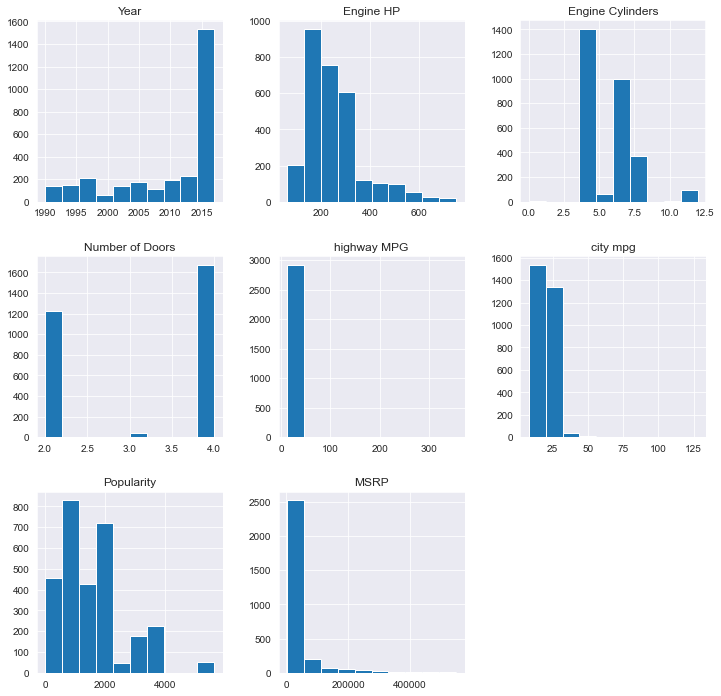

In [6]:
df.hist(figsize=(12,12));#taking a look at the data of the df through histograms

In [7]:
df['Engine Cylinders'].value_counts() #looking at engine cylinders values to check due to the zero values

4.0     1403
6.0      996
8.0      372
12.0      92
5.0       66
0.0        6
10.0       2
Name: Engine Cylinders, dtype: int64

In [8]:
df[df['Engine Cylinders']==0] #checking the rows where Enginer Cylinders is equal to zero to check

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900


In [9]:
df[df['Engine HP'].isnull()] #taking a look at the NaN values

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4,Luxury,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4,Luxury,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4,Luxury,Large,Sedan,25,17,61,64915


In [10]:
df[df['Engine Cylinders'].isnull()] #taking a look at the NaN values

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,36620


In [11]:
df.duplicated().sum() #checking for duplicates

167

In [12]:
df[df.duplicated()] #taking a look at the duplicated rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2839,Plymouth,Colt,1994,regular unleaded,113.0,4.0,MANUAL,front wheel drive,4,NaN,Compact,Sedan,30,23,535,2000
2914,Ford,Contour,1998,regular unleaded,125.0,4.0,MANUAL,front wheel drive,4,NaN,Midsize,Sedan,32,21,5657,2000
2915,Ford,Contour,1998,regular unleaded,125.0,4.0,MANUAL,front wheel drive,4,NaN,Midsize,Sedan,32,21,5657,2000
2916,Ford,Contour,1998,regular unleaded,125.0,4.0,MANUAL,front wheel drive,4,NaN,Midsize,Sedan,32,21,5657,2000


#### Observations
<li>915 null values in Market Category column, 7 in Engine HP column and 2 in Engine Cylinders column
<li>histograms and df.describe() showed zeros in the Engine Cylinders column which was worrying but after closely checking it appeared that the cars are electric so no cylinders therefore nothing is wrong with the zeros
<li>167 duplicated rows 
<li>Irrelevant columns to our study

In [13]:
df.drop_duplicates(inplace=True) #dropping duplicates

In [14]:
#since the missing values in Engine HP are 7 and 2 in the Enginer Cylinders which are easy to replace i researched the missing values and replaced them
df.loc[539:541,'Engine HP']=111

In [15]:
df.loc[[2905,2907],'Engine HP']=335

In [16]:
df.loc[[2906,2908],'Engine HP']=400

In [17]:
df['Engine Cylinders'].fillna(0,inplace=True)

In [18]:
df.info() #checking that the NaN values are filled and the dropped duplicated rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 0 to 2938
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               2772 non-null   object 
 1   Model              2772 non-null   object 
 2   Year               2772 non-null   int64  
 3   Engine Fuel Type   2772 non-null   object 
 4   Engine HP          2772 non-null   float64
 5   Engine Cylinders   2772 non-null   float64
 6   Transmission Type  2772 non-null   object 
 7   Driven_Wheels      2772 non-null   object 
 8   Number of Doors    2772 non-null   int64  
 9   Market Category    1906 non-null   object 
 10  Vehicle Size       2772 non-null   object 
 11  Vehicle Style      2772 non-null   object 
 12  highway MPG        2772 non-null   int64  
 13  city mpg           2772 non-null   int64  
 14  Popularity         2772 non-null   int64  
 15  MSRP               2772 non-null   int64  
dtypes: float64(2), int64(6),

In [19]:
#dropping irrelevant columns
df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1,inplace=True)

In [20]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [21]:
df.describe()

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,2009.818543,252.417027,5.507576,27.853175,20.097403,45369.327201
std,8.114298,117.739036,1.862161,9.743244,7.464525,64949.810929
min,1990.000000,62.000000,0.000000,12.000000,8.000000,2000.000000
25%,2004.000000,170.000000,4.000000,23.000000,16.000000,19183.750000
50%,2015.000000,220.000000,6.000000,27.000000,19.000000,30075.000000
75%,2016.000000,305.000000,6.000000,32.000000,23.000000,43251.250000
max,2017.000000,750.000000,12.000000,354.000000,128.000000,548800.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: The change of the MPG over the years

In [22]:
mpg_y = df.groupby('Year')['highway MPG','city mpg'].mean()


<ipython-input-22-c615a2037938>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mpg_y = df.groupby('Year')['highway MPG','city mpg'].mean()


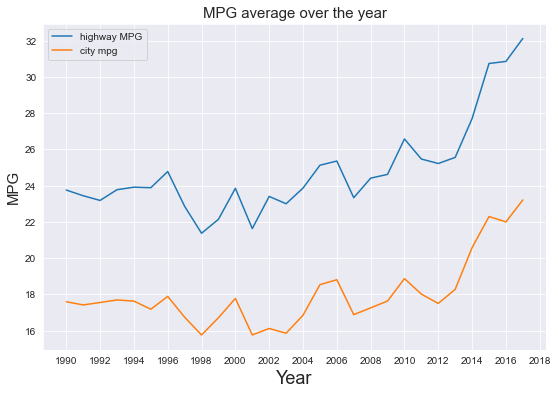

In [23]:
mpg_y.plot(figsize=(9,6))
plt.xticks(np.arange(1990, 2019, 2))
plt.xlabel('Year', fontsize=18)
plt.ylabel('MPG', fontsize=15)
plt.title('MPG average over the year', fontsize=15);

#### The trend seemed to be almost flatlining until 2012 which after it the MPG averages increased to a large extent

### Research Question 2: The change of the MSRP over the years

In [24]:
msrp_y = df.groupby('Year')['MSRP'].mean()

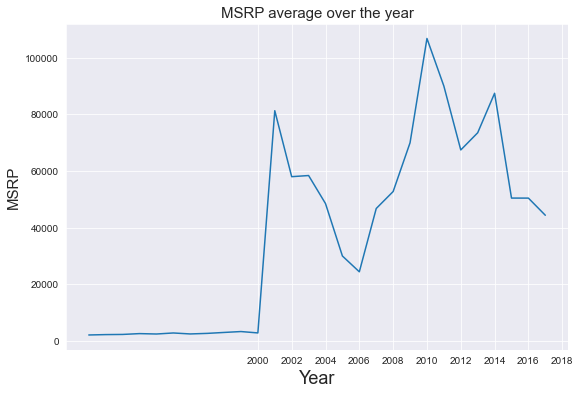

In [25]:
msrp_y.plot(figsize=(9,6))
plt.xticks(np.arange(2000, 2019, 2))
plt.xlabel('Year', fontsize=18)
plt.ylabel('MSRP', fontsize=15)
plt.title('MSRP average over the year', fontsize=15);

#### There was high spike around 2010 starting in 2006 and peaking at 2010 in the MSRP

### Research Question 3: The number of cars by make and the highest number year over year

In [26]:
make_count = df.Make.value_counts()

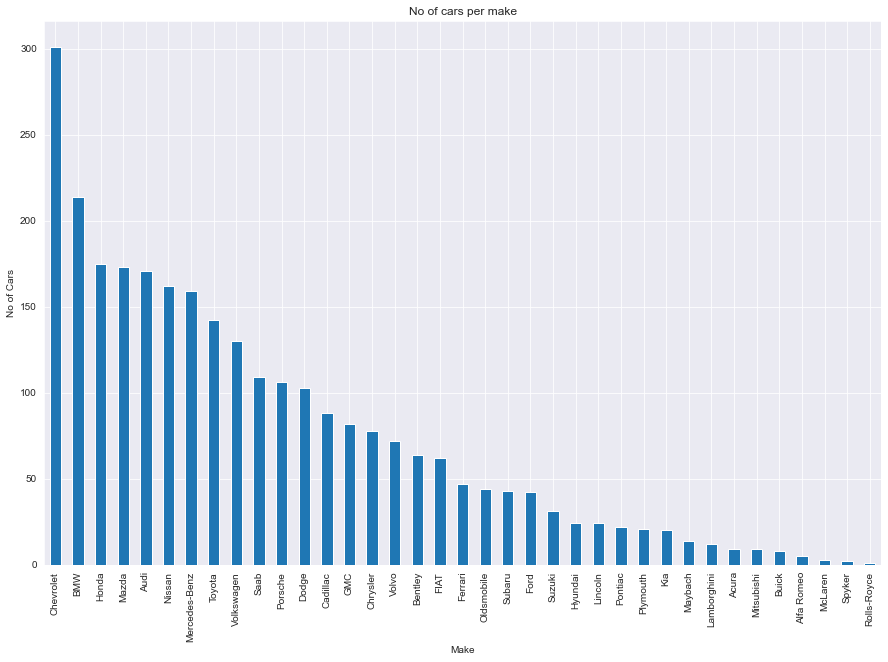

In [27]:
make_count.plot(kind = 'bar',figsize=(15,10),ylabel='No of Cars',title ='No of cars per make',xlabel='Make');


In [30]:
years = df['Year'].unique()
most_common_make=[] 

df_make = df.loc[:,['Make','Year']]

for year in years:
    df1 = df_make[df_make['Year'] == year].drop(['Year'], axis = 1) 
    common_make = df1.value_counts().idxmax() 
    
    
    most_common_make.append((year, common_make[0]))
    
df_most_popular_make = pd.DataFrame(most_common_make, columns=['Year', 'most_common_make']).sort_values('Year').reset_index().drop(['index'], axis=1)
df_most_popular_make

,Year,most_common_make
0,1990,Volvo
1,1991,Mercedes-Benz
2,1992,Mercedes-Benz
3,1993,Mercedes-Benz
4,1994,Audi
5,1995,Volvo
6,1996,Saab
7,1997,Chevrolet
8,1998,Chevrolet
9,1999,Mazda


In [36]:
df_most_popular_make['most_common_make'].value_counts()

Chevrolet        8
Saab             3
Mercedes-Benz    3
Mazda            3
Nissan           2
BMW              2
Volvo            2
Volkswagen       1
Subaru           1
Honda            1
Oldsmobile       1
Audi             1
Name: most_common_make, dtype: int64

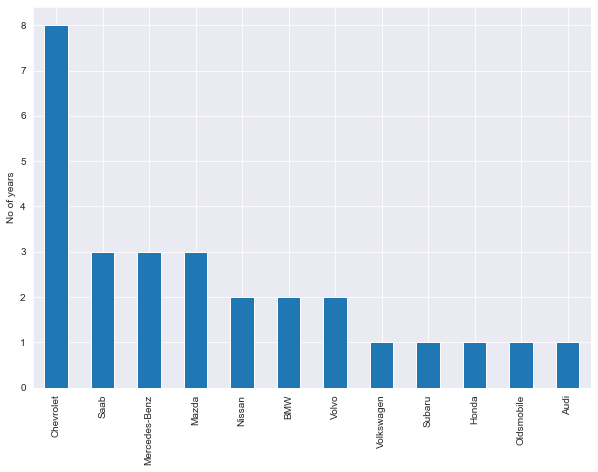

In [43]:
df_most_popular_make['most_common_make'].value_counts().plot(kind='bar',figsize=(10,7),ylabel='No of years');

### As shown in the two graphs Checvrolet is dominating the market by the sheer amount of cars/Makes